Adding dropout layers decreases overfitting

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [27]:
x_train = np.linspace(-1,1,20)
x_test = np.linspace(-1,1,20)

In [28]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

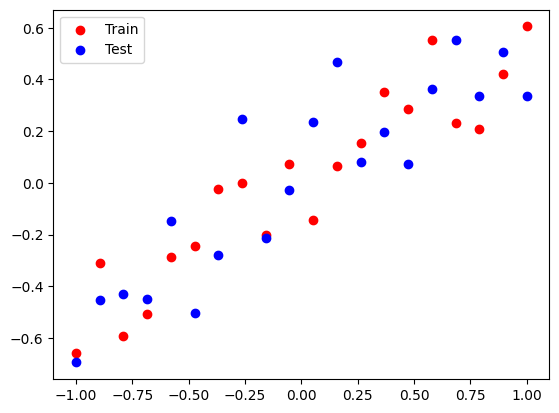

In [29]:
plt.scatter(x_train, y_train, c="red", label = "Train")
plt.scatter(x_test, y_test, c="blue", label = "Test")
plt.legend()
plt.show()

#Regression model example of dropout layers

In [30]:
from re import VERBOSE
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=1) )
model.add(Dense(128,activation = "relu"))
model.add(Dense(1,activation = "linear"))

adam = Adam(learning_rate = 0.01)
model.compile(loss="mse", optimizer = adam, metrics=['mse'])

history = model.fit(x_train,y_train,epochs=500, validation_data = (x_test, y_test), verbose = False)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
_,train_mse = model.evaluate(x_train,y_train,verbose=0)
_,test_mse = model.evaluate(x_test,y_test,verbose=0)

print(f'train_mse = {train_mse}, test_mse = {test_mse}')


train_mse = 0.004602325614541769, test_mse = 0.046291936188936234


Above mse shows that the model learnt well from training data than test (training mse < test_mse)

In [31]:
predict = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


(-1.5, 1.5)

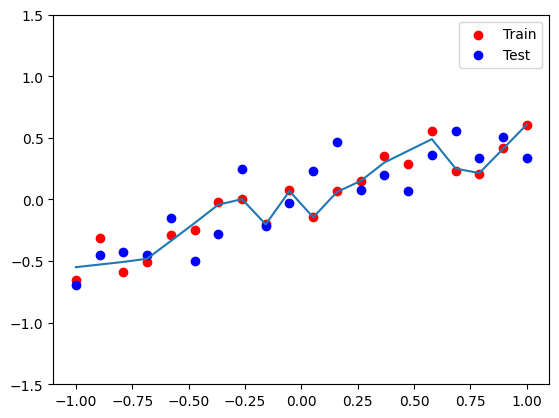

In [32]:
plt.figure()
plt.scatter(x_train, y_train, c="red", label = "Train")
plt.scatter(x_test, y_test, c="blue", label = "Test")
plt.plot(x_test, predict)
plt.legend()
plt.ylim(-1.5,1.5)

#Dropout model

In [36]:
model_droput = Sequential()
model_droput.add(Dense(128,input_dim=1, activation="relu"))
model_droput.add(Dropout(0.2))
model_droput.add(Dense(128, activation="relu"))
model_droput.add(Dropout(0.2))
model_droput.add(Dense(1,activation="linear"))

adam = Adam(learning_rate = 0.01)

model_droput.compile(loss="mse",  optimizer=adam, metrics=['mse'])

history_dropout = model_droput.fit(x_train,y_train,epochs=500,validation_data = (x_test,y_test), verbose=False )


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
_,train_mse_dropout = model_droput.evaluate(x_train, y_train, verbose=0)
_,test_mse_dropout = model_droput.evaluate(x_test, y_test, verbose=0)
print(f'train_mse = {train_mse_dropout}, test_mse = {test_mse_dropout}')

train_mse = 0.010825944133102894, test_mse = 0.039739493280649185


difference between them not much

In [41]:
pred_dropout = model_droput.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


(-1.5, 1.5)

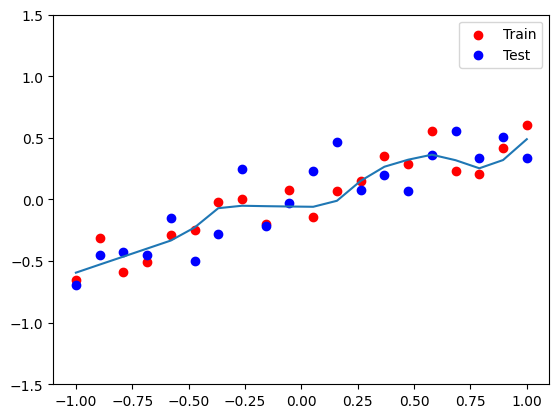

In [42]:
plt.figure()
plt.scatter(x_train, y_train, c="red", label = "Train")
plt.scatter(x_test, y_test, c="blue", label = "Test")
plt.plot(x_test, pred_dropout)
plt.legend()
plt.ylim(-1.5,1.5)